In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

/home/turbots/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
import numpy as np
import pylab as plt
import glob
import os
from pprint import pprint
import scipy.integrate as inte
import scipy.special as special
import scipy.interpolate as interp
import scipy.signal as sig

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [208]:
import stephane.display.graphes as graphes
import stephane.tools.Smath as smath

import icewave.tools.datafolders as df
#import sympy #symoblic python
import mpmath as math
import cv2
import glob
import csv
import os

import icewave

In [10]:
import scipy.io as io

['ACCEL_X', 'ACCEL_Y', 'ACCEL_Z', 'CRC', 'CRC_CALC', 'DATA_VEL_X', 'DATA_VEL_Y', 'DATA_VEL_Z', 'DELTA_ANGLE_X', 'DELTA_ANGLE_Y', 'DELTA_ANGLE_Z', 'GYRO_X', 'GYRO_Y', 'GYRO_Z', 'IMU_STATUS', 'TEMP', 'TIME_STAMP', 'TS_fix', 't', 'time']
['ACCEL_X', 'ACCEL_Y', 'ACCEL_Z', 'CRC', 'CRC_CALC', 'DATA_VEL_X', 'DATA_VEL_Y', 'DATA_VEL_Z', 'DELTA_ANGLE_X', 'DELTA_ANGLE_Y', 'DELTA_ANGLE_Z', 'GYRO_X', 'GYRO_Y', 'GYRO_Z', 'IMU_STATUS', 'TEMP', 'TIME_STAMP', 'TS_fix', 't', 'time']
['ACCEL_X', 'ACCEL_Y', 'ACCEL_Z', 'CRC', 'CRC_CALC', 'DATA_VEL_X', 'DATA_VEL_Y', 'DATA_VEL_Z', 'DELTA_ANGLE_X', 'DELTA_ANGLE_Y', 'DELTA_ANGLE_Z', 'GYRO_X', 'GYRO_Y', 'GYRO_Z', 'IMU_STATUS', 'TEMP', 'TIME_STAMP', 'TS_fix', 't', 'time']


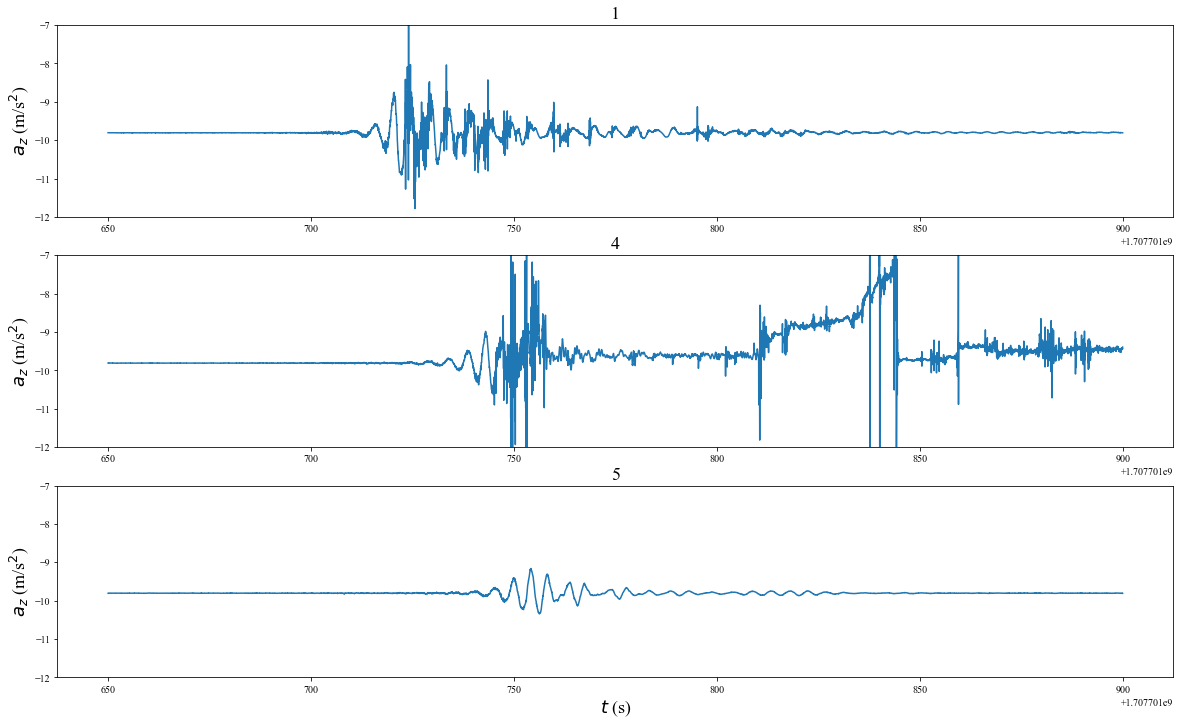

In [285]:
date = '0211'
folder = '/media/turbots/BicWin2024/Share/Data'
buoylist = [1,4,5]
num_record = [2,1,1]

savefolder = f"{folder}/{date}/BoueeVague/Resultats/"
os.path.exists(folder)


nrow = 3
fig,axs = plt.subplots(nrows=nrow,figsize=(20,4*nrow))

for i,(buoy,num) in enumerate(zip(buoylist,num_record)):
    datafolder = f"{folder}/{date}/BoueeVague/B{buoy}/"

    filelist = glob.glob(datafolder+'mat/*.mat')
    filename = filelist[num]
    #pprint(filelist)
    
    ti = 1707701350+300#-10000
    tf = 1707702100-200#+10000


    f = h5py.File(filename)
    tbuoys,ts = get_time(f)
    print(list(f['IMU']['IMU_DATA'].keys()))

    t = f['IMU']['IMU_DATA']['t'][0,:]+tbuoys

    indices = np.logical_and(t>=ti,t<tf)

    t = t[indices]
#    acx = f['IMU']['IMU_DATA']['ACCEL_X'][0,indices]
#    acy = f['IMU']['IMU_DATA']['ACCEL_Y'][0,indices]
    acz = f['IMU']['IMU_DATA']['ACCEL_Z'][0,indices]
    
    axs[i].plot(t,acz)
    axs[i].set_ylim([-12,-7])
    
    figs = graphes.legende('','$a_z$ (m/s$^2$)',f"$B_{buoy}$",ax=axs[i])
    #graphes.save_figs(figs,savedir=savefolder,prefix=f"phone{phone}_",overwrite=True)

    #nt = len(t)     
figs = graphes.legende('$t$ (s)','$a_z$ (m/s$^2$)',f"$B_{buoy}$",ax=axs[2])
graphes.save_figs(figs,savedir=savefolder,prefix='buoys_',overwrite=True)

In [ ]:
import icewave.phone.load as load
import icewave.tools.rw_data as rw_data

phonelist = [11,21,16,12,13,8]

tref_phone = data_phone['vt'][0]

nrow = 6
fig,axs = plt.subplots(nrows=nrow,figsize=(20,4*nrow))

for i,phone in enumerate(phonelist):
    filename = f"/media/turbots/BicWin2024/Share/Data/0211/Telephones/Phyphox_Buoys/phonebuoys_{phone}_vz.txt"
    d = rw_data.read_csv(filename)

    keys = d[0]
    print(keys)
    data_phone={}
    d = np.asarray(d[1:],dtype=float)

    data_phone[keys[0]]=d[:,0]
    data_phone[keys[1]]=d[:,1]

    print(data_phone['vz'].shape)
    axs[i].plot(data_phone['vt'],data_phone['vz'])


['ACCEL_X', 'ACCEL_Y', 'ACCEL_Z', 'CRC', 'CRC_CALC', 'DATA_VEL_X', 'DATA_VEL_Y', 'DATA_VEL_Z', 'DELTA_ANGLE_X', 'DELTA_ANGLE_Y', 'DELTA_ANGLE_Z', 'GYRO_X', 'GYRO_Y', 'GYRO_Z', 'IMU_STATUS', 'TEMP', 'TIME_STAMP', 'TS_fix', 't', 'time']
['ACCEL_X', 'ACCEL_Y', 'ACCEL_Z', 'CRC', 'CRC_CALC', 'DATA_VEL_X', 'DATA_VEL_Y', 'DATA_VEL_Z', 'DELTA_ANGLE_X', 'DELTA_ANGLE_Y', 'DELTA_ANGLE_Z', 'GYRO_X', 'GYRO_Y', 'GYRO_Z', 'IMU_STATUS', 'TEMP', 'TIME_STAMP', 'TS_fix', 't', 'time']
['ACCEL_X', 'ACCEL_Y', 'ACCEL_Z', 'CRC', 'CRC_CALC', 'DATA_VEL_X', 'DATA_VEL_Y', 'DATA_VEL_Z', 'DELTA_ANGLE_X', 'DELTA_ANGLE_Y', 'DELTA_ANGLE_Z', 'GYRO_X', 'GYRO_Y', 'GYRO_Z', 'IMU_STATUS', 'TEMP', 'TIME_STAMP', 'TS_fix', 't', 'time']


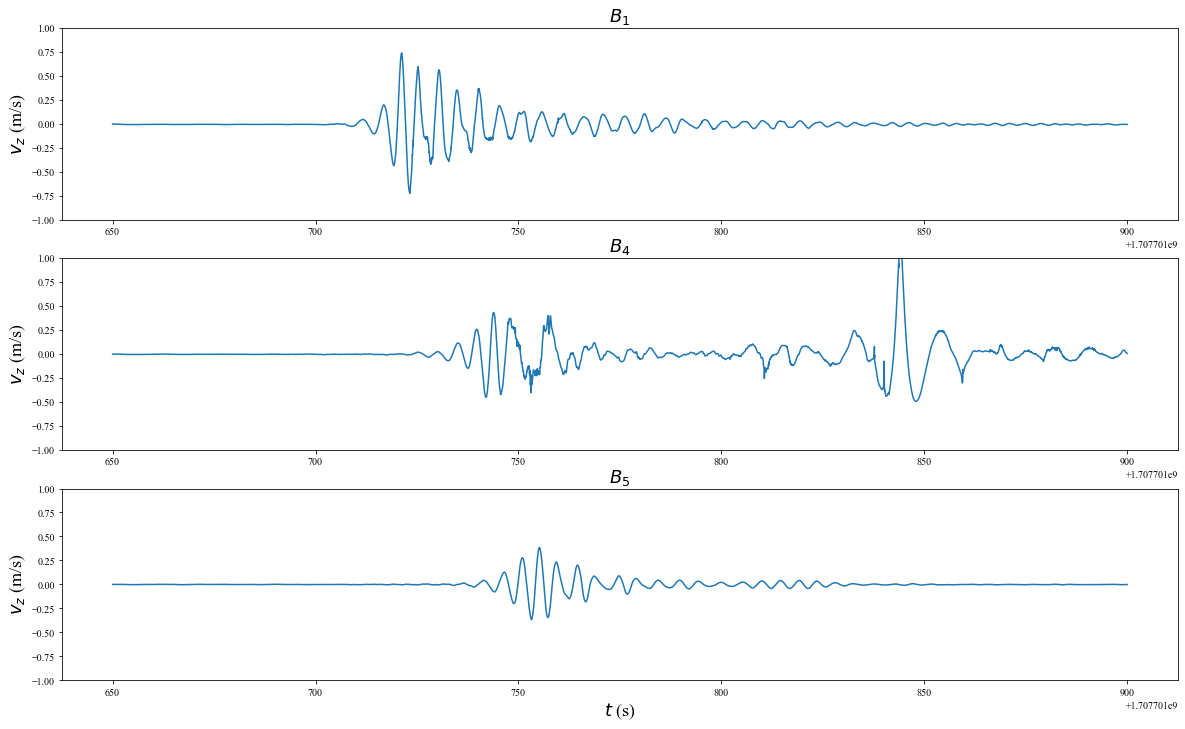

In [292]:
date = '0211'
folder = '/media/turbots/BicWin2024/Share/Data'
buoylist = [1,4,5]
num_record = [2,1,1]

savefolder = f"{folder}/{date}/BoueeVague/Resultats/"
os.path.exists(folder)


nrow = 3
fig,axs = plt.subplots(nrows=nrow,figsize=(20,4*nrow))

for i,(buoy,num) in enumerate(zip(buoylist,num_record)):
    datafolder = f"{folder}/{date}/BoueeVague/B{buoy}/"

    filelist = glob.glob(datafolder+'mat/*.mat')
    filename = filelist[num]
    #pprint(filelist)
    
    ti = 1707701350+300#-10000
    tf = 1707702100-200#+10000


    f = h5py.File(filename)
    tbuoys,ts = get_time(f)
    print(list(f['IMU']['IMU_DATA'].keys()))

    t = f['IMU']['IMU_DATA']['t'][0,:]+tbuoys

    indices = np.logical_and(t>=ti,t<tf)

    t = t[indices]
#    acx = f['IMU']['IMU_DATA']['ACCEL_X'][0,indices]
#    acy = f['IMU']['IMU_DATA']['ACCEL_Y'][0,indices]
    acz = f['IMU']['IMU_DATA']['ACCEL_Z'][0,indices]
    (b,a) = sig.butter(6,0.1/30,btype='high')
    acz = sig.filtfilt(b, a, acz)

    dt = np.nanmean(np.diff(t))
    vz = np.cumsum(acz)*dt


    
    axs[i].plot(t,vz)
    #axs[i].set_ylim([-12,-7])
    axs[i].set_ylim([-1,1])
    
    figs = graphes.legende('','$v_z$ (m/s)',f"$B_{buoy}$",ax=axs[i])
    #graphes.save_figs(figs,savedir=savefolder,prefix=f"phone{phone}_",overwrite=True)

    #nt = len(t)     
figs = graphes.legende('$t$ (s)','$v_z$ (m/s)',f"$B_{buoy}$",ax=axs[2])
graphes.save_figs(figs,savedir=savefolder,prefix='buoys_',overwrite=True)

In [270]:


import time

print(f['IMU']['IMU_DATA'].keys())

print(f['IMU'].keys())
print(f['IMU']['UTC_TIME'].keys())
print(f['IMU']['UTC_TIME']['MIN'])


import datetime
a = f['IMU']['UTC_TIME']

print(time_stamp)


#time.get_time(time_stamp)
#date = datetime.datetime.strptime(t00.split(" UTC")[0], "%Y-%m-%d %H:%M:%S")

def get_time(f):
    a = f['IMU']['UTC_TIME']
    time_stamp = f"{int(a['YEAR'][0,0])}-{int(a['MONTH'][0,0])}-{int(a['DAY'][0,0])} {int(a['HOUR'][0,0])}:{int(a['MIN'][0,0])}:{int(a['SEC'][0,0])}.{int(a['NANOSEC'][0,0])}"
    #time.struct_time(tm_year=a['YEAR'],tm_mon=a['MONTH'],tm_day=a['DAY'],tm_hour=a['HOUR'],tm_min=a['MIN'],tm_sec=a['SEC'])
    t00, t01 = time_stamp.split(".")
    date = datetime.datetime.strptime(t00.split(" UTC")[0], "%Y-%m-%d %H:%M:%S")
    tbuoys = date.timestamp() + int(t01)/1000
    ts = datetime.datetime.fromtimestamp(tbuoys)
    return (tbuoys,ts)
    


<KeysViewHDF5 ['ACCEL_X', 'ACCEL_Y', 'ACCEL_Z', 'CRC', 'CRC_CALC', 'DATA_VEL_X', 'DATA_VEL_Y', 'DATA_VEL_Z', 'DELTA_ANGLE_X', 'DELTA_ANGLE_Y', 'DELTA_ANGLE_Z', 'GYRO_X', 'GYRO_Y', 'GYRO_Z', 'IMU_STATUS', 'TEMP', 'TIME_STAMP', 'TS_fix', 't', 'time']>
<KeysViewHDF5 ['EKF_EULER', 'EKF_NAV', 'EKF_QUAT', 'EVENT_A', 'EVENT_B', 'GPS1_POS', 'GPS1_VEL', 'IMU_DATA', 'MAG', 'STATUS', 'UTC_TIME', 'file_name', 'mdir', 'mname']>
<KeysViewHDF5 ['CLOCK_STATUS', 'CRC', 'CRC_CALC', 'DAY', 'GPS_TOW', 'HOUR', 'MIN', 'MONTH', 'NANOSEC', 'SEC', 'TIME_STAMP', 'TS_fix', 'YEAR', 't', 'time']>
<HDF5 dataset "MIN": shape (1, 3602), type "<f8">
2024-2-11 18:59:56.0


['ACCEL_X', 'ACCEL_Y', 'ACCEL_Z', 'CRC', 'CRC_CALC', 'DATA_VEL_X', 'DATA_VEL_Y', 'DATA_VEL_Z', 'DELTA_ANGLE_X', 'DELTA_ANGLE_Y', 'DELTA_ANGLE_Z', 'GYRO_X', 'GYRO_Y', 'GYRO_Z', 'IMU_STATUS', 'TEMP', 'TIME_STAMP', 'TS_fix', 't', 'time']
(17500,)
(17500,)


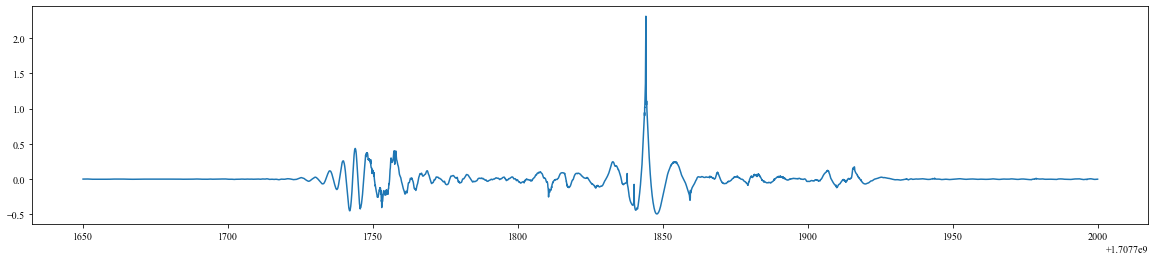

In [232]:
import h5py

ti = 1707701350+300#-10000
tf = 1707702100-100#+10000


f = h5py.File(filename)
tbuoys,ts = get_time(f)
print(list(f['IMU']['IMU_DATA'].keys()))

t = f['IMU']['IMU_DATA']['t'][0,:]+tbuoys

indices = np.logical_and(t>=ti,t<tf)

t = t[indices]
acx = f['IMU']['IMU_DATA']['ACCEL_X'][0,indices]
acy = f['IMU']['IMU_DATA']['ACCEL_Y'][0,indices]
acz = f['IMU']['IMU_DATA']['ACCEL_Z'][0,indices]

(b,a) = sig.butter(6,0.1/30,btype='high')
acz = sig.filtfilt(b, a, acz)
acx = sig.filtfilt(b, a, acx)
acy = sig.filtfilt(b, a, acy)


dt = np.nanmean(np.diff(t))
vz = np.cumsum(acz)*dt
vx = np.cumsum(acx)*dt
vy = np.cumsum(acy)*dt


vzd = f['IMU']['IMU_DATA']['DATA_VEL_Z'][0,indices]


print(t.shape)
print(acz.shape)


fig,ax = plt.subplots(figsize=(20,4))

plt.plot(t,vz)
#plt.plot(t,vzd+9.81)
#plt.plot(t,vx)
#plt.plot(t,vy)

#plt.xlim(2080,2400)
#plt.ylim(-1.2,1.2)

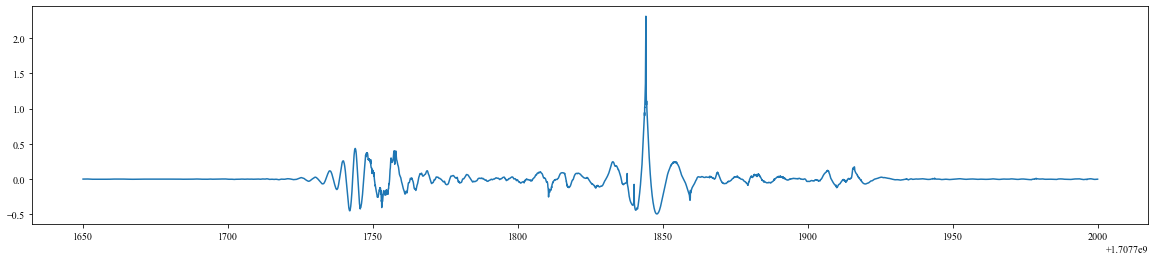

In [233]:


fig,ax = plt.subplots(figsize=(20,4))

plt.plot(t,vz)

['vt', 'vz']
(37500,)
['vt', 'vz']
(38060,)
['vt', 'vz']
(38030,)
['vt', 'vz']
(37655,)
['vt', 'vz']
(37768,)
['vt', 'vz']
(37500,)


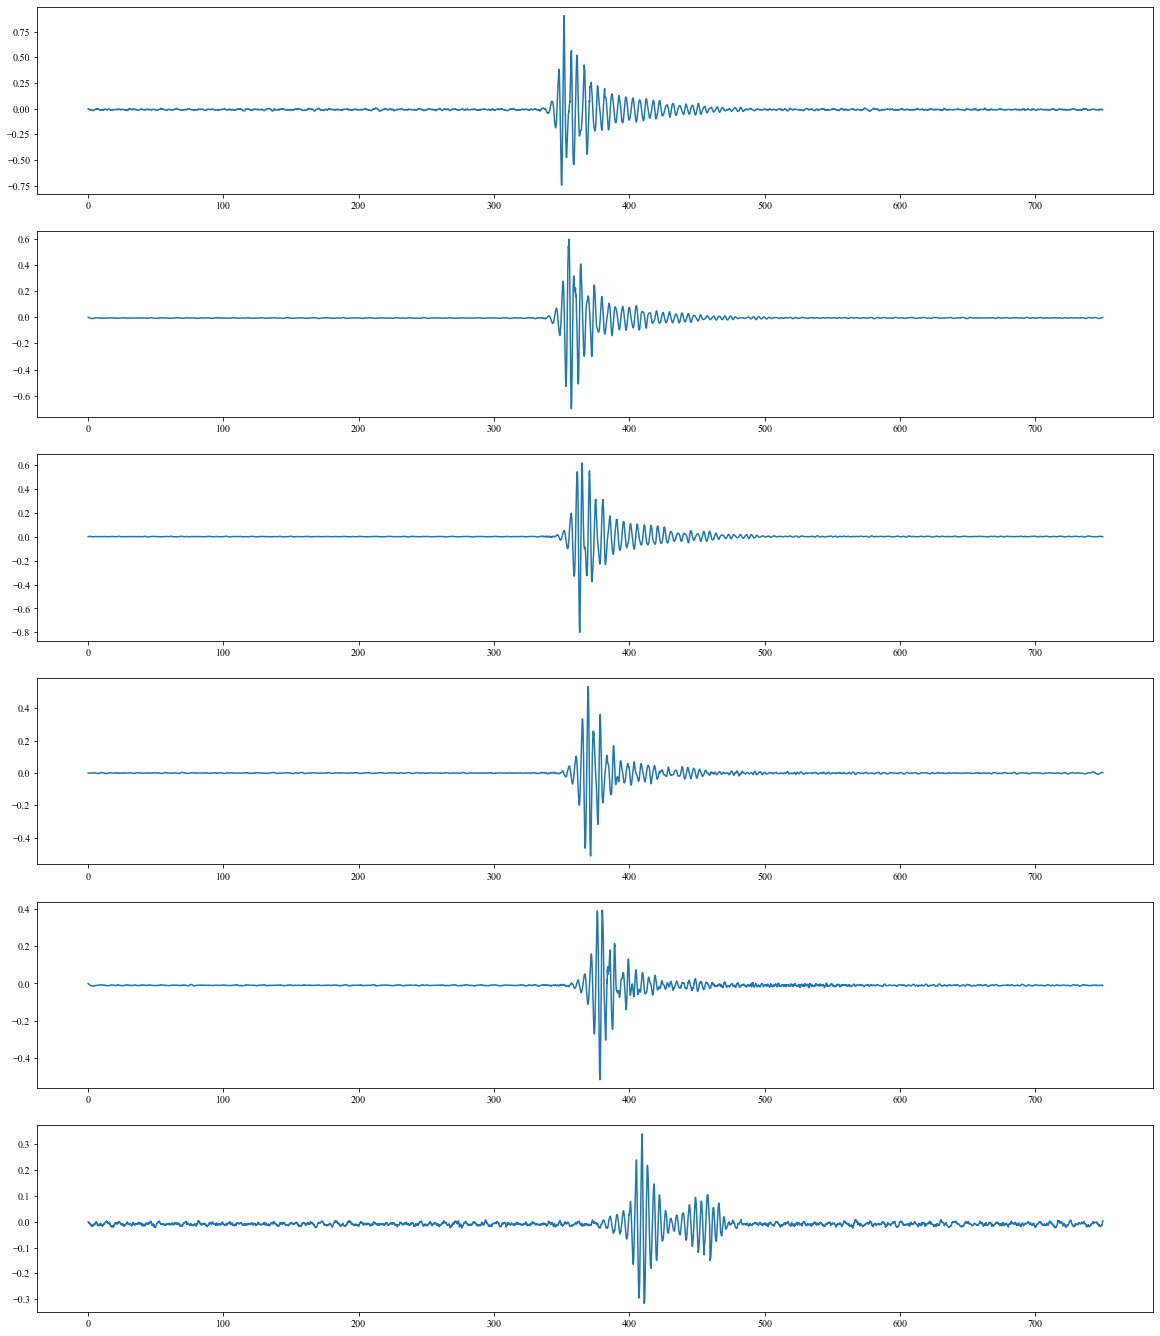

In [308]:
import icewave.phone.load as load
import icewave.tools.rw_data as rw_data

phonelist = [11,21,16,12,13,8]


nrow = 6
fig,axs = plt.subplots(nrows=nrow,figsize=(20,4*nrow))

data_phone={}

for i,phone in enumerate(phonelist):
    filename = f"/media/turbots/BicWin2024/Share/Data/0211/Telephones/Phyphox_Buoys/phonebuoys_{phone}_vz.txt"
    d = rw_data.read_csv(filename)

    keys = d[0]
    print(keys)
    d = np.asarray(d[1:],dtype=float)

    data_phone[phone]={}
    data_phone[phone][keys[0]]=d[:,0]
    data_phone[phone][keys[1]]=d[:,1]

    if phone==12:
        tref_phone = data_phone[phone]['vt']

    print(data_phone[phone]['vz'].shape)
    axs[i].plot(data_phone[phone]['vt'],data_phone[phone]['vz'])

        

In [286]:
data_phone['vt']

array([-1.10056400e-02,  8.85629654e-03,  2.87191868e-02, ...,
        7.49941665e+02,  7.49961521e+02,  7.49981377e+02])

In [305]:
tref_phone

1707701650.0

figure already exists
/media/turbots/BicWin2024/Share/Data/0211/BoueeVague/Resultats/


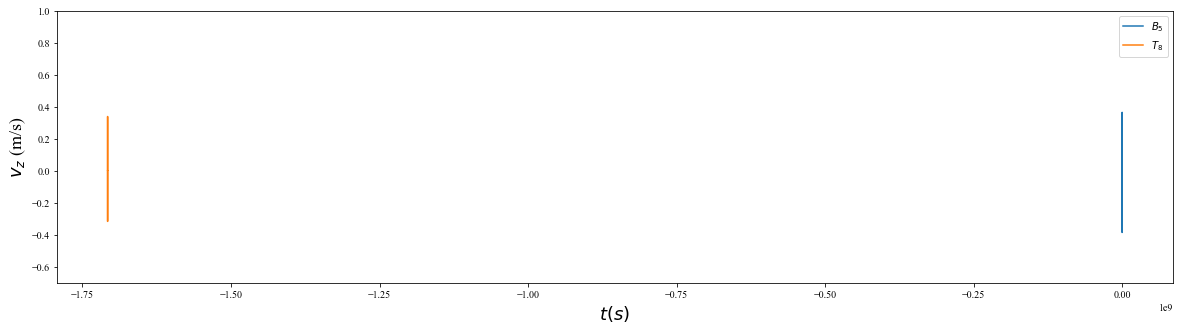

In [303]:
fig,ax = plt.subplots(figsize=(20,5))
plt.plot(t-t[0]+300+6.2,-vz)
plt.plot(data_phone['vt']-tref_phone-t[0],data_phone['vz'])
#plt.plot(t-t[0]+300+4.2,vzd+9.81)

#plt.xlim(350,500)
plt.ylim(-0.7,1)

plt.legend([f'$B_{buoy}$','$T_{'+str(phone)+'}$'])
figs = graphes.legende('$t (s)$','$v_z$ (m/s)','')
graphes.save_figs(figs,savedir=savefolder)
print(savefolder)